In [655]:
#Import libraries
import pandas as pd 
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import h2o
from h2o.automl import H2OAutoML

In [656]:
#Read data
dt_car_train = pd.read_csv('./Dataset/dt_car_train_2021.csv')
dt_car_train

,id,price_category,make,year,mileage,power,car_type,color,fuel_type,transmission,...,flg_missing_transmission,flg_missing_n_doors,flg_missing_n_cylinders,flg_missing_displacement,flg_missing_dry_weight,flg_missing_acceleration,flg_missing_top_speed,flg_missing_n_seats,flg_missing_emission,flg_missing_emission_label
0,2,5 (10K-15K),volkswagen,2012,168390,160,stationwagon,wit,benzine,Handgeschakeld,...,0,0,0,0,0,0,0,0,0,0
1,3,6 (> 15K),renault,2015,12170,200,hatchback,wit,benzine,Automaat,...,0,0,0,0,0,0,0,0,0,0
2,4,3 (2K-5K),renault,2008,233485,103,mpv,blauw,diesel,Handgeschakeld,...,0,0,0,0,0,0,0,0,0,1
3,5,4 (5K-10K),mercedes-benz,2012,287567,109,mpv,zwart,diesel,Automaat,...,0,0,0,0,0,0,0,0,0,0
4,7,6 (> 15K),kia,2013,72565,0,coupe,oranje,diesel,Automaat,...,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,10286,3 (2K-5K),smart,2006,102299,61,0,grijs,benzine,Semi-automaat,...,0,0,0,0,1,1,0,0,1,1
8228,10287,1 (< 1K),daewoo,2000,103659,52,hatchback,grijs,benzine,Handgeschakeld,...,0,0,0,0,0,0,0,0,0,0
8229,10288,4 (5K-10K),opel,2011,120980,95,stationwagon,grijs,diesel,Handgeschakeld,...,0,0,0,0,0,0,0,0,0,0
8230,10289,6 (> 15K),kia,2013,76890,135,mpv,grijs,benzine,Handgeschakeld,...,0,0,0,0,0,0,0,0,0,0


In [657]:
#Data types per column
dt_car_train.dtypes

id                              int64
price_category                 object
make                           object
year                            int64
mileage                         int64
power                           int64
car_type                       object
color                          object
fuel_type                      object
transmission                   object
n_doors                         int64
n_cylinders                     int64
displacement                    int64
dry_weight                      int64
acceleration                  float64
top_speed                       int64
n_seats                         int64
emission                        int64
emission_label                 object
flg_missing_power               int64
flg_missing_car_type            int64
flg_missing_color               int64
flg_missing_fuel_type           int64
flg_missing_transmission        int64
flg_missing_n_doors             int64
flg_missing_n_cylinders         int64
flg_missing_

In [658]:
#Data set size, rows and columns
dt_car_train.shape

(8232, 33)

# Data Pre processing

It was identified that some car manufacturers where with errors being with car manufacturers that are unkonwn or using the car model name as a car manufacturer, so a transformation was done to the data:

In [659]:
#Map inconsistent car maker to correct label 
dt_car_train['car_maker'] =  dt_car_train['make'].replace({'citroën':'citroen',
                                                    'škoda':'skoda',
                                                    'land':'land-rover',
                                                    'gereserveerd!':'',
                                                    'v40':'volvo',
                                                    'v70':'volvo',
                                                    'mercedes':'mercedes-benz',
                                                    '3x':'',
                                                    'palmo':'',
                                                    'zeer':'',
                                                    'r-design': 'volvo',
                                                    'gereserveerd':'',
                                                    'corvette': 'chevrolet',
                                                    'van':'',
                                                    's-klasse':'mercedes-benz',
                                                    'w203':'',
                                                    'nu':'',
                                                    'vectra':'',
                                                    'dealer':'',
                                                    'golf':'volkswagen',
                                                    'vw': 'volkswagen',
                                                    'a4':'audi',
                                                    '940':'',
                                                    'touran':'volkswagen',
                                                    '850':'',
                                                    'mev':'',
                                                    'westfield':'',
                                                    'toth-twa':'',
                                                    'corsa':'opel',
                                                    'astra':'opel',
                                                    '307':'',
                                                    'w210':'',
                                                    'bombardier':'',
                                                    'mb':'',
                                                    'goede':'',
                                                    'yaris':'toyota',
                                                    'schneider':'',
                                                    'wij':'',
                                                    'bomvoll!!!':'',
                                                    'bmw_car123456':'bmw',
                                                    'leer':'',
                                                    'laguna':'renault',
                                                    's6':'',
                                                    'c-klasse':'mercedes-benz',
                                                    'punto':'fiat',
                                                    'berlingo':'citroen',
                                                    '407':'',
                                                    'gezocht':'',
                                                    'a.':'',
                                                    'autohilhorst':'',
                                                    'nieuwe':'',
                                                    'colt':'',
                                                    'boom':'',
                                                    'rolls':'rolls-royce',
                                                    'tt':'audi',
                                                    'morgan':'',
                                                    'c180':'',
                                                    'andrey':'',
                                                    'qashqai':'',
                                                    's40':'',
                                                    'mooie':'',
                                                    'e-klasse':'mercedes-benz',
                                                    'polo':'volkswagen',
                                                    '2.0-16v':'',
                                                    'opel/':'opel'
                                                    })
print('Before processing the car makers were:')
print(dt_car_train['make'].unique())
print('After processing the car makers are:')
print(dt_car_train['car_maker'].unique())
print('\n From ' + str(len(dt_car_train['make'].unique())) + ' to ' +str(len(dt_car_train['car_maker'].unique())) +' car manufacturers') 

Before processing the car makers were:
['volkswagen' 'renault' 'mercedes-benz' 'kia' 'opel' 'nissan' 'fiat'
 'mini' 'bmw' 'mitsubishi' 'saab' 'hyundai' 'peugeot' 'porsche' 'audi'
 'citroen' 'citroën' 'daewoo' 'volvo' 'honda' 'toyota' 'ford' 'suzuki'
 'chrysler' 'seat' 'cadillac' 'daihatsu' 'alfa' 'smart' 'land-rover'
 'mazda' 'skoda' 'jaguar' 'chevrolet' 'lancia' 'nu' 'land' 'škoda' 'dodge'
 'v70' 'gereserveerd!' 'rover' 'jeep' 'ssangyong' 'mercedes' 'palmo'
 'lamborghini' 'dacia' 'r-design' 'lexus' '3x' 'ferrari' 'mg' 'maserati'
 'zeer' 'ds' 'subaru' 'ligier' 'landwind' 'v40' 'gereserveerd' 'corvette'
 'vw' 'van' 'lotus' 'rolls-royce' 'bentley' 's-klasse' 'w203' 'lincoln'
 'vectra' 'hummer' 'aston' 'dealer' 'opel/' 'pontiac' '2.0-16v' 'golf'
 'a4' '940' 'infiniti' 'touran' '850' 'mev' 'westfield' 'toth-twa' 'corsa'
 'astra' '307' 'w210' 'bombardier' 'abarth' 'mb' 'goede' 'yaris'
 'schneider' 'wij' 'bomvoll!!!' 'bmw_car123456' 'leer' 'laguna' 's6'
 'c-klasse' 'punto' 'berlingo' '407' '

Feature Engineering - creation of new variabless:
    
* Color traslated to english
* Car maker country
* Average price based on the interval
* Numerical rank of price class

In [660]:
car_maker_country = pd.read_csv('car_maker_country.csv')
colors = pd.read_csv('color_translations.csv')
average_price =  pd.read_csv('average_price.csv')

In [661]:
dt_car_train = pd.merge(dt_car_train, 
                     colors, 
                     left_on ='color',
                     right_on = 'Color Dutch', 
                     how ='left')
dt_car_train = pd.merge(dt_car_train, 
                     average_price, 
                     left_on ='price_category',
                     right_on = 'class', 
                     how ='left')
dt_car_train = pd.merge(dt_car_train, 
                     car_maker_country, 
                     left_on ='car_maker',
                     right_on = 'car_make', 
                     how ='left')

In [662]:
dict_classes_to_numbers = {'1 (< 1K)' : 1,
                           '2 (1K-2K)' : 2,
                           '3 (2K-5K)' : 3,
                           '4 (5K-10K)': 4,
                           '5 (10K-15K)' : 5,
                           '6 (> 15K)': 6}

# Map the values of the dataframe
dt_car_train['class_rank']= dt_car_train['price_category'].map(dict_classes_to_numbers)


Convert values to NA for rows whith NA flag on respective column

In [663]:
dt_car_train.loc[dt_car_train.flg_missing_power == 1, 'power'] = None
dt_car_train.loc[dt_car_train.flg_missing_car_type == 1, 'car_type'] = None
dt_car_train.loc[dt_car_train.flg_missing_color == 1, 'color'] = None
dt_car_train.loc[dt_car_train.flg_missing_fuel_type == 1, 'fuel_type'] = None
dt_car_train.loc[dt_car_train.flg_missing_transmission == 1, 'transmission'] = None
dt_car_train.loc[dt_car_train.flg_missing_n_doors == 1, 'n_doors'] = None
dt_car_train.loc[dt_car_train.flg_missing_n_cylinders == 1, 'n_cylinders'] = None
dt_car_train.loc[dt_car_train.flg_missing_displacement == 1, 'displacement'] = None
dt_car_train.loc[dt_car_train.flg_missing_dry_weight == 1, 'dry_weight'] = None
dt_car_train.loc[dt_car_train.flg_missing_acceleration == 1, 'acceleration'] = None
dt_car_train.loc[dt_car_train.flg_missing_top_speed == 1, 'top_speed'] = None
dt_car_train.loc[dt_car_train.flg_missing_n_seats == 1, 'n_seats'] = None
dt_car_train.loc[dt_car_train.flg_missing_emission == 1, 'emission'] = None
dt_car_train.loc[dt_car_train.flg_missing_emission_label == 1, 'emission_label'] = None


In [664]:
dt_car_train

,id,price_category,make,year,mileage,power,car_type,color,fuel_type,transmission,...,flg_missing_emission,flg_missing_emission_label,car_maker,Color Dutch,Color English,class,average price,car_make,country,class_rank
0,2,5 (10K-15K),volkswagen,2012,168390,160.0,stationwagon,wit,benzine,Handgeschakeld,...,0,0,volkswagen,wit,White,NaN,NaN,volkswagen,Germany,5
1,3,6 (> 15K),renault,2015,12170,200.0,hatchback,wit,benzine,Automaat,...,0,0,renault,wit,White,6 (> 15K),NaN,renault,France,6
2,4,3 (2K-5K),renault,2008,233485,103.0,mpv,blauw,diesel,Handgeschakeld,...,0,1,renault,blauw,Blue,3 (2K-5K),2500.0,renault,France,3
3,5,4 (5K-10K),mercedes-benz,2012,287567,109.0,mpv,zwart,diesel,Automaat,...,0,0,mercedes-benz,zwart,Black,4 (5K-10K),7500.0,mercedes-benz,Germany,4
4,7,6 (> 15K),kia,2013,72565,NaN,coupe,oranje,diesel,Automaat,...,0,1,kia,NaN,NaN,6 (> 15K),NaN,kia,South Korea,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8227,10286,3 (2K-5K),smart,2006,102299,61.0,None,grijs,benzine,Semi-automaat,...,1,1,smart,grijs,Gray,3 (2K-5K),2500.0,smart,Germany,3
8228,10287,1 (< 1K),daewoo,2000,103659,52.0,hatchback,grijs,benzine,Handgeschakeld,...,0,0,daewoo,grijs,Gray,1 (< 1K),500.0,daewoo,South Korea,1
8229,10288,4 (5K-10K),opel,2011,120980,95.0,stationwagon,grijs,diesel,Handgeschakeld,...,0,0,opel,grijs,Gray,4 (5K-10K),7500.0,opel,Germany,4
8230,10289,6 (> 15K),kia,2013,76890,135.0,mpv,grijs,benzine,Handgeschakeld,...,0,0,kia,grijs,Gray,6 (> 15K),NaN,kia,South Korea,6


In [665]:
dt_car_train.to_csv('dt_car_train_pre_processed_1.csv')

In [666]:
#Saving dataset just with numerical variables (disconsidering NA flags)

dt_car_numerical_only = dt_car_train.drop(['make', 'price_category', 'car_type', 'color', 'fuel_type',
        'transmission', 'emission_label','flg_missing_power',
'flg_missing_car_type',
'flg_missing_color',
'flg_missing_fuel_type',
'flg_missing_transmission',
'flg_missing_n_doors',
'flg_missing_n_cylinders',
'flg_missing_displacement',
'flg_missing_dry_weight',
'flg_missing_acceleration',
'flg_missing_top_speed',
'flg_missing_n_seats',
'flg_missing_emission',
'flg_missing_emission_label',
'car_maker',
'Color Dutch',
'Color English',
'class',
'average price',
'car_make',
'country',
'id'
        ], axis=1)

dt_car_numerical_only.dtypes

year              int64
mileage           int64
power           float64
n_doors         float64
n_cylinders     float64
displacement    float64
dry_weight      float64
acceleration    float64
top_speed       float64
n_seats         float64
emission        float64
class_rank        int64
dtype: object

# Data visualisation

## Univariate analysis 

### Target variable

Price Category
1 (< 1K)        924
2 (1K-2K)      1429
3 (2K-5K)      2334
4 (5K-10K)     1808
5 (10K-15K)     728
6 (> 15K)      1009
dtype: int64

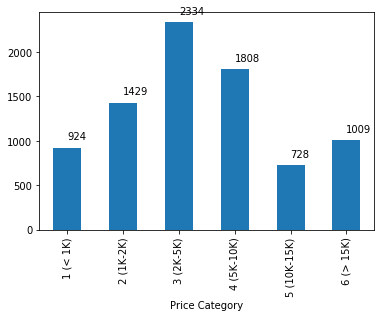

In [667]:
ax = dt_car_train.groupby(dt_car_train['price_category'].rename('Price Category')).size().plot.bar()
x_offset = 0
y_offset = 100
for p in ax.patches:
    b = p.get_bbox()
    val = "{:}".format(int(b.y1 + b.y0))        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset-10))
    

dt_car_train.groupby(dt_car_train['price_category'].rename('Price Category')).size()

### Independent variables

#### Discrete and categorical variables frequency bar chart

car_maker
                  52
abarth             1
alfa              82
alpina             1
aston              2
audi             342
bentley            6
bmw              453
cadillac           5
chevrolet         97
chrysler          36
citroen          357
dacia             15
daewoo            61
daihatsu          45
dodge              8
ds                 2
ferrari           12
fiat             337
ford             490
honda             63
hummer             2
hyundai          129
infiniti           2
jaguar            55
jeep              12
kia              177
lamborghini        2
lancia            19
land-rover        40
landwind           1
lexus              9
ligier             1
lincoln            5
lotus              6
maserati           8
mazda             84
mercedes-benz    485
mg                15
mini             121
mitsubishi       107
nissan           157
opel             650
peugeot          636
pontiac            1
porsche           71
renault          790
rol

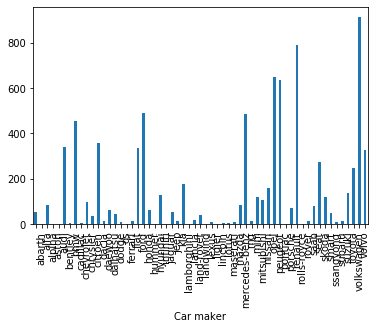

In [668]:
dt_car_train.groupby(dt_car_train['car_maker'].rename('Car maker')).size().plot.bar()
dt_car_train.groupby(dt_car_train['car_maker'].rename('car_maker')).size()

# Doors
2.0     984
3.0    1268
4.0    1830
5.0    3581
6.0       3
dtype: int64

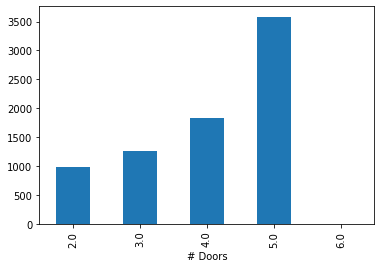

In [669]:
dt_car_train.groupby(dt_car_train['n_doors'].rename('# Doors')).size().plot.bar()
dt_car_train.groupby(dt_car_train['n_doors'].rename('# Doors')).size()

# cylinders
1.0      31
2.0      37
3.0     724
4.0    6001
5.0     212
6.0     574
8.0     172
dtype: int64

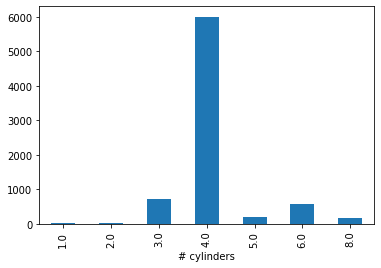

In [670]:
dt_car_train.groupby(dt_car_train['n_cylinders'].rename('# cylinders')).size().plot.bar()
dt_car_train.groupby(dt_car_train['n_cylinders'].rename('# cylinders')).size()

# seats
2.0     198
3.0       2
4.0    1310
5.0    5574
6.0      16
7.0     212
8.0       8
9.0      13
dtype: int64

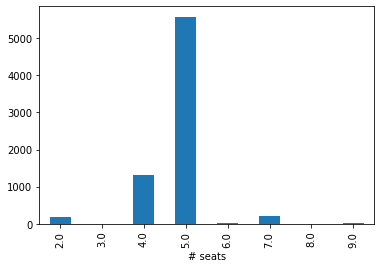

In [671]:
dt_car_train.groupby(dt_car_train['n_seats'].rename('# seats')).size().plot.bar()
dt_car_train.groupby(dt_car_train['n_seats'].rename('# seats')).size()

Car type
bestelauto            1
cabriolet           456
coupe               224
hatchback          3660
mpv                 948
rolstoelvervoer      13
sedan               830
stationwagon       1415
terreinwagen         68
dtype: int64

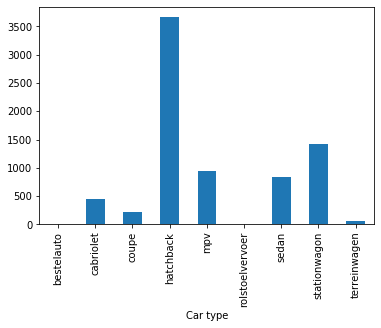

In [672]:
dt_car_train.groupby(dt_car_train['car_type'].rename('Car type')).size().plot.bar()
dt_car_train.groupby(dt_car_train['car_type'].rename('Car type')).size()

Car color
Beige      152
Black     1960
Blue      1425
Brown      119
Gold        10
Gray      2795
Green      390
Red        479
Silver     194
Violet      56
White      479
Yellow     101
dtype: int64

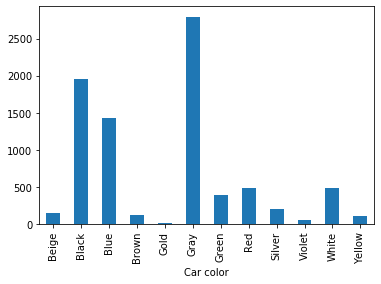

In [673]:
dt_car_train.groupby(dt_car_train['Color English'].rename('Car color')).size().plot.bar()
dt_car_train.groupby(dt_car_train['Color English'].rename('Car color')).size()

transmission
1 versnellingen, Automaat                            5
1 versnellingen, Continu variabele transmissie       3
2 versnellingen, Handgeschakeld                      2
3 versnellingen, Automaat                            3
3 versnellingen, Handgeschakeld                      1
4 versnellingen                                      3
5 versnellingen                                     34
6 versnellingen                                      4
9 versnellingen, Automaat                            2
Automaat                                          1661
Continu variabele transmissie                       10
Handgeschakeld                                    6299
Semi-automaat                                       36
dtype: int64

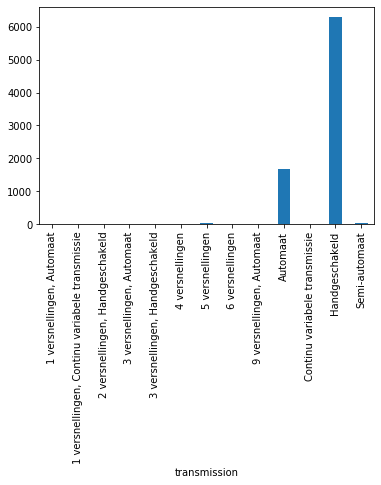

In [674]:
dt_car_train.groupby(dt_car_train['transmission'].rename('transmission')).size().plot.bar()
dt_car_train.groupby(dt_car_train['transmission'].rename('transmission')).size()

emission_label
Euro1       2
Euro2     517
Euro3    1110
Euro4    2060
Euro5    1477
Euro6     269
dtype: int64

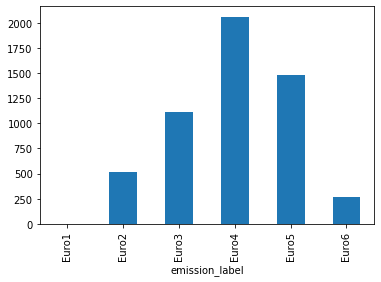

In [675]:
dt_car_train.groupby(dt_car_train['emission_label'].rename('emission_label')).size().plot.bar()
dt_car_train.groupby(dt_car_train['emission_label'].rename('emission_label')).size()

#### Continuous variables box plots 

In [676]:
dt_car_numerical_only.describe()

,year,mileage,power,n_doors,n_cylinders,displacement,dry_weight,acceleration,top_speed,n_seats,emission,class_rank
count,8232.000000,8.232000e+03,7965.000000,7666.000000,7751.000000,7932.000000,7243.000000,6695.000000,6605.000000,7333.000000,7735.000000,8232.000000
mean,2006.228377,1.688634e+05,123.058632,4.045787,4.149271,1763.521054,1235.848681,20.562315,189.163210,4.810173,66.796639,3.366132
std,5.012421,1.051120e+05,68.829820,1.070321,0.897185,768.435187,312.482867,26.514121,27.761057,0.736745,66.230931,1.471491
min,1996.000000,0.000000e+00,0.000000,2.000000,1.000000,4.000000,100.000000,1.000000,45.000000,2.000000,1.000000,1.000000
25%,2002.000000,1.049720e+05,75.000000,3.000000,4.000000,1300.000000,1004.000000,10.000000,170.000000,5.000000,18.000000,2.000000
50%,2006.000000,1.600635e+05,109.000000,4.000000,4.000000,1598.000000,1221.000000,12.000000,185.000000,5.000000,53.000000,3.000000
75%,2010.000000,2.206745e+05,140.000000,5.000000,4.000000,1985.000000,1406.500000,14.000000,204.000000,5.000000,87.000000,4.000000
max,2015.000000,4.500142e+06,799.000000,6.000000,8.000000,12175.000000,3500.000000,99.900000,330.000000,9.000000,279.000000,6.000000


Single variables box plots

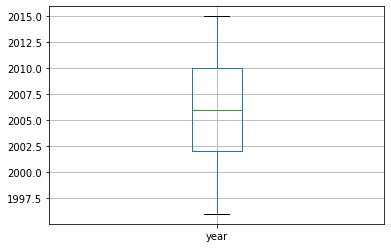

In [677]:
boxplot_year = dt_car_numerical_only.boxplot(column=['year'])

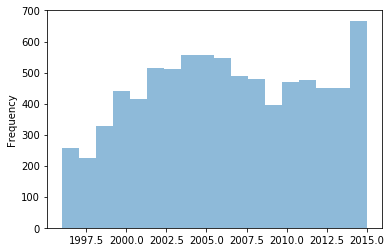

In [678]:
dt_car_numerical_only['year'].plot.hist(bins=18, alpha=0.5)

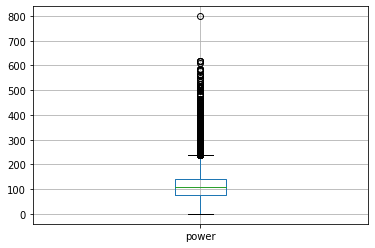

In [679]:
boxplot_power = dt_car_numerical_only.boxplot(column=['power'])

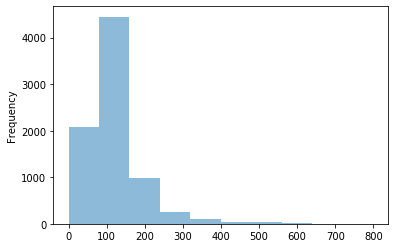

In [680]:
dt_car_numerical_only['power'].plot.hist(bins=10, alpha=0.5)

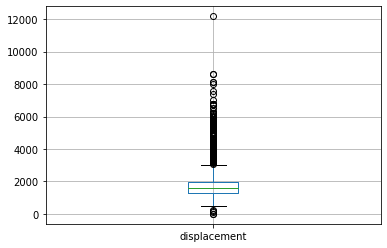

In [681]:
boxplot_displacement = dt_car_numerical_only.boxplot(column=['displacement'])

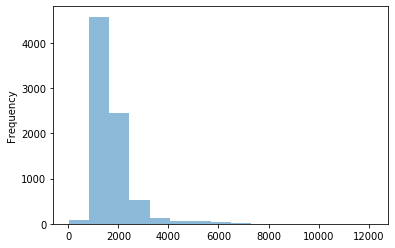

In [682]:
dt_car_numerical_only['displacement'].plot.hist(bins=15, alpha=0.5)

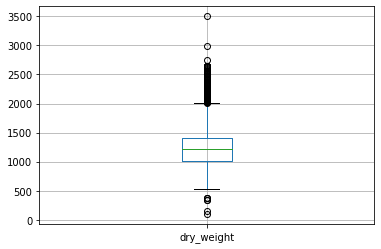

In [683]:
boxplot_dry_weight = dt_car_numerical_only.boxplot(column=['dry_weight'])

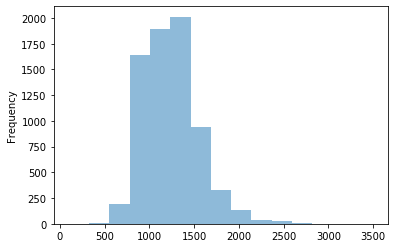

In [684]:
dt_car_numerical_only['dry_weight'].plot.hist(bins=15, alpha=0.5)

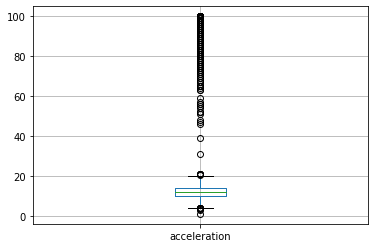

In [685]:
boxplot_acceleration = dt_car_numerical_only.boxplot(column=['acceleration']) 

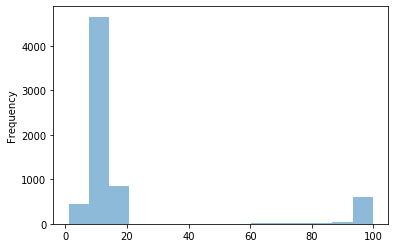

In [686]:
dt_car_numerical_only['acceleration'].plot.hist(bins=15, alpha=0.5)

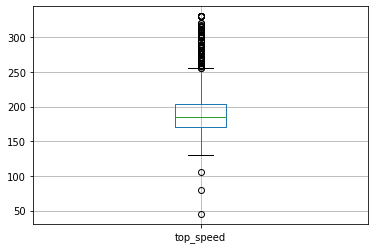

In [687]:
boxplot_top_speed = dt_car_numerical_only.boxplot(column=['top_speed']) 

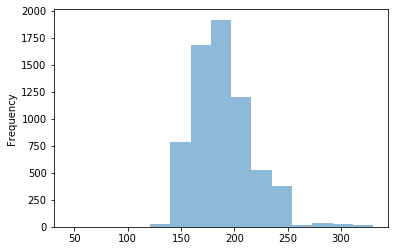

In [688]:
dt_car_numerical_only['top_speed'].plot.hist(bins=15, alpha=0.5)

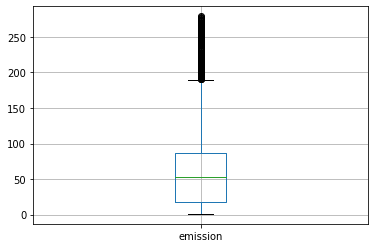

In [689]:
boxplot_emission = dt_car_numerical_only.boxplot(column=['emission']) 

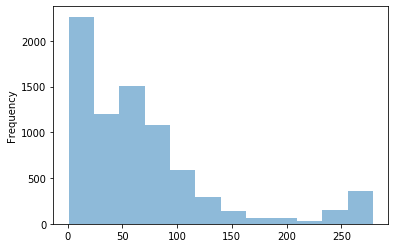

In [690]:
dt_car_numerical_only['emission'].plot.hist(bins=12, alpha=0.5)

Kurtosis analysis

The excess kurtosis is used in statistics and probability theory to compare the kurtosis coefficient with that normal distribution. Excess kurtosis can be positive (Leptokurtic distribution), negative (Platykurtic distribution), or near to zero (Mesokurtic distribution). Since normal distributions have a kurtosis of 3, excess kurtosis is calculating by subtracting kurtosis by 3.

* Leptokurtic or heavy-tailed distribution (kurtosis more than normal distribution k>3
* Mesokurtic (kurtosis same as the normal distribution) k=3
* Platykurtic or short-tailed distribution (kurtosis less than normal distribution) k<3

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

In [691]:
dt_car_numerical_only.kurtosis()

year             -0.996997
mileage         388.305563
power            11.729197
n_doors          -0.835789
n_cylinders       6.917626
displacement     16.020648
dry_weight        1.803411
acceleration      4.652644
top_speed         1.977083
n_seats           7.507658
emission          2.279606
class_rank       -0.718578
dtype: float64

Skewness analysis

In statistics, skewness is a degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution (bell curve) in a given set of data. 

* The symmetrical distribution has zero skewness as all measures of a central tendency lies in the middle

* In positively skewed, the mean of the data is greater than the median

* In negatively skewed, the mean of the data is less than the median

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

In [692]:
dt_car_numerical_only.skew()

year            -0.021382
mileage         10.929960
power            2.785604
n_doors         -0.717530
n_cylinders      1.990119
displacement     3.042778
dry_weight       0.875216
acceleration     2.548357
top_speed        0.982914
n_seats         -0.544284
emission         1.585311
class_rank       0.231655
dtype: float64

## bivariate analysis

### Correlation analysis

Spearman and Pearson correlation metrics

https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/

In [693]:
correlation_matrix_pearson = dt_car_numerical_only.corr(method = 'pearson')
correlation_matrix_pearson.style.background_gradient(cmap='coolwarm')

,year,mileage,power,n_doors,n_cylinders,displacement,dry_weight,acceleration,top_speed,n_seats,emission,class_rank
year,1.000000,-0.409212,0.093170,0.236375,-0.117123,-0.110033,0.105935,-0.079443,0.075306,0.018334,0.118059,0.686327
mileage,-0.409212,1.000000,-0.002426,0.067356,0.094560,0.123629,0.189358,-0.008302,0.065810,0.187105,0.012500,-0.400422
power,0.093170,-0.002426,1.000000,-0.049932,0.660452,0.858758,0.741450,-0.141718,0.875261,-0.053811,0.178464,0.491832
n_doors,0.236375,0.067356,-0.049932,1.000000,-0.070080,-0.047345,0.169052,-0.140244,-0.049930,0.482580,0.075802,0.072076
n_cylinders,-0.117123,0.094560,0.660452,-0.070080,1.000000,0.711964,0.596852,-0.080392,0.585112,0.026976,0.056999,0.250374
displacement,-0.110033,0.123629,0.858758,-0.047345,0.711964,1.000000,0.765850,-0.114230,0.779007,0.031397,0.160471,0.327603
dry_weight,0.105935,0.189358,0.741450,0.169052,0.596852,0.765850,1.000000,-0.103592,0.697332,0.271604,0.166332,0.435708
acceleration,-0.079443,-0.008302,-0.141718,-0.140244,-0.080392,-0.114230,-0.103592,1.000000,-0.170968,-0.000622,-0.068868,-0.119921
top_speed,0.075306,0.065810,0.875261,-0.049930,0.585112,0.779007,0.697332,-0.170968,1.000000,-0.048546,0.133244,0.455751
n_seats,0.018334,0.187105,-0.053811,0.482580,0.026976,0.031397,0.271604,-0.000622,-0.048546,1.000000,0.004047,-0.054770


In [694]:
correlation_matrix_spearman = dt_car_numerical_only.corr(method = 'spearman')
correlation_matrix_spearman.style.background_gradient(cmap='coolwarm')

,year,mileage,power,n_doors,n_cylinders,displacement,dry_weight,acceleration,top_speed,n_seats,emission,class_rank
year,1.000000,-0.518272,0.098767,0.242501,-0.164020,-0.151175,0.105857,-0.119662,0.073289,-0.010183,-0.045241,0.712797
mileage,-0.518272,1.000000,0.142823,0.053377,0.213170,0.338529,0.256963,-0.039546,0.158840,0.265643,0.164452,-0.500660
power,0.098767,0.142823,1.000000,0.086449,0.610659,0.861445,0.875978,-0.736982,0.930935,0.175339,0.241495,0.443733
n_doors,0.242501,0.053377,0.086449,1.000000,-0.059388,0.029580,0.171660,-0.050184,0.014217,0.476207,0.085096,0.102147
n_cylinders,-0.164020,0.213170,0.610659,-0.059388,1.000000,0.671523,0.591749,-0.450471,0.563475,0.141331,0.120767,0.166528
displacement,-0.151175,0.338529,0.861445,0.029580,0.671523,1.000000,0.860693,-0.592810,0.797243,0.205007,0.264064,0.227740
dry_weight,0.105857,0.256963,0.875978,0.171660,0.591749,0.860693,1.000000,-0.549942,0.777195,0.313223,0.260742,0.399077
acceleration,-0.119662,-0.039546,-0.736982,-0.050184,-0.450471,-0.592810,-0.549942,1.000000,-0.840268,-0.031360,-0.159635,-0.359259
top_speed,0.073289,0.158840,0.930935,0.014217,0.563475,0.797243,0.777195,-0.840268,1.000000,0.114149,0.214564,0.395630
n_seats,-0.010183,0.265643,0.175339,0.476207,0.141331,0.205007,0.313223,-0.031360,0.114149,1.000000,0.069077,-0.044525


### Bivariate analysis - between independent variables

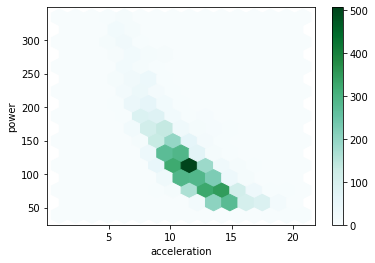

In [695]:
dt_car_numerical_only[(dt_car_numerical_only['acceleration'] < 26) & (dt_car_numerical_only['power'] < 335)].plot.hexbin(x='acceleration', y='power', gridsize=15, sharex=False)


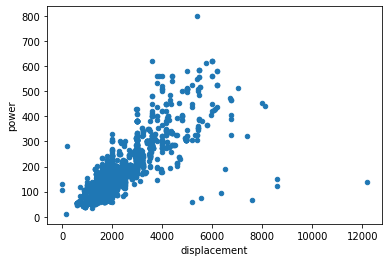

In [696]:
dt_car_numerical_only.plot.scatter(x='displacement', y='power')


### Bivariate analysis - target variable and independent variables

Year relation with price category

/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


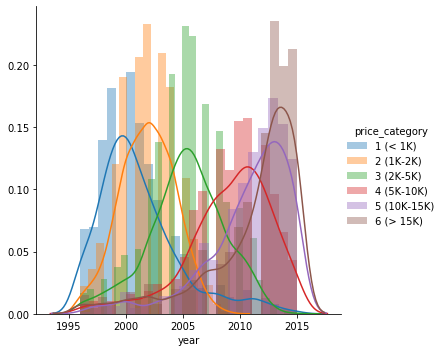

In [697]:
orders = ['1 (< 1K)' , '2 (1K-2K)', '3 (2K-5K)', '4 (5K-10K)', '5 (10K-15K)','6 (> 15K)']
sns.FacetGrid(dt_car_train, hue = 'price_category', size = 5, hue_order=orders).map(sns.distplot, "year").add_legend()

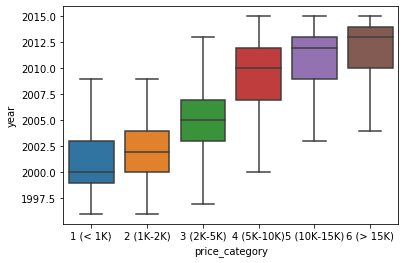

In [698]:
sns.boxplot(x='price_category', y='year', data = dt_car_train, order=orders, showfliers = False)

Power relation with price category

/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


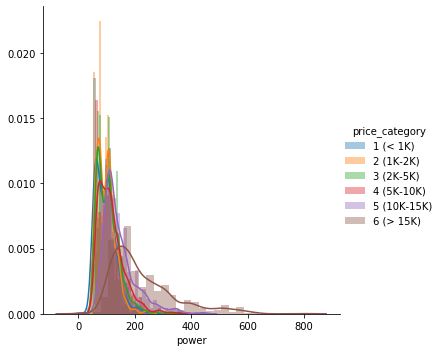

In [699]:
sns.FacetGrid(dt_car_train, hue = 'price_category', size = 5, hue_order=orders).map(sns.distplot, "power").add_legend()

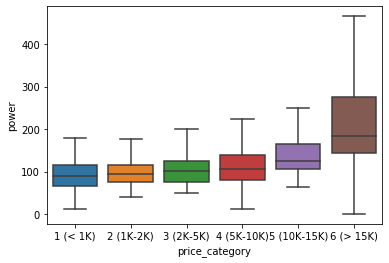

In [700]:
sns.boxplot(x='price_category', y='power', data = dt_car_train, order=orders, showfliers = False)

Acceleration relation with price category

/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


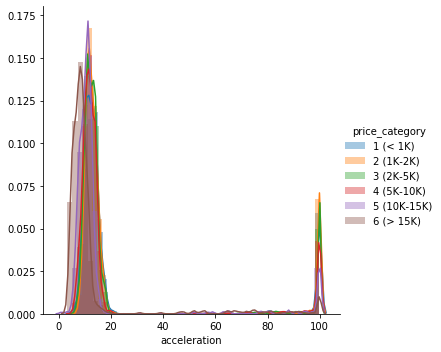

In [701]:
sns.FacetGrid(dt_car_train, hue = 'price_category', size = 5, hue_order=orders).map(sns.distplot, "acceleration").add_legend()

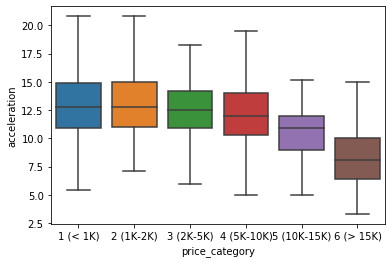

In [702]:
sns.boxplot(x='price_category', y='acceleration', data = dt_car_train, order=orders, showfliers = False)

There is probably an error is this data. The top slowest cars to reach 60 mph (apporximatly 100 km/h) do not take ore than 30 seconds

https://www.hotcars.com/13-slowest-cars-to-60mph-youll-probably-sleep-midway/

Mileage relation with price category

/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


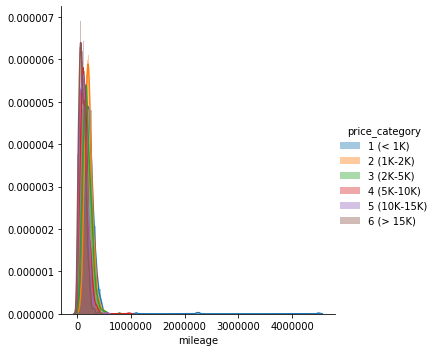

In [703]:
sns.FacetGrid(dt_car_train, hue = 'price_category', size = 5, hue_order=orders).map(sns.distplot, "mileage").add_legend()

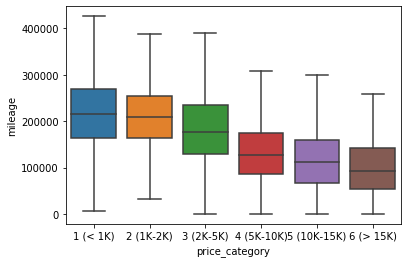

In [704]:
sns.boxplot(x='price_category', y='mileage', data = dt_car_train, order=orders, showfliers = False)

Top speed relation with price category

/Users/jorgeferreira/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


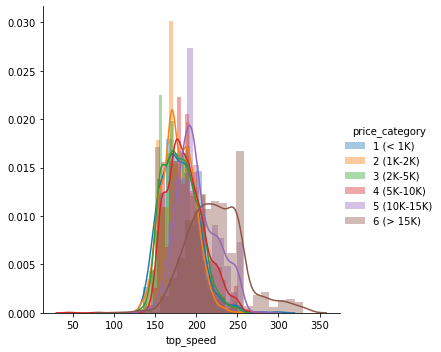

In [705]:
sns.FacetGrid(dt_car_train, hue = 'price_category', size = 5, hue_order=orders).map(sns.distplot, "top_speed").add_legend()

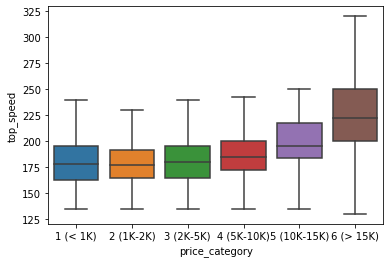

In [706]:
sns.boxplot(x='price_category', y='top_speed', data = dt_car_train, order=orders, showfliers = False)

# Modeling

Seting up H2O

In [866]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 6 hours 52 mins
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.4
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_jorgeferreira_aznp3u
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.057 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [867]:
hf_train = h2o.H2OFrame(dt_car_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [868]:
train_dt = hf_train.drop(['id', 'make', 'color', 'flg_missing_power','flg_missing_car_type'
                       ,'flg_missing_color','flg_missing_fuel_type','flg_missing_transmission',
                       'flg_missing_n_doors','flg_missing_n_cylinders','flg_missing_displacement',
                       'flg_missing_dry_weight','flg_missing_acceleration','flg_missing_top_speed'
                       ,'flg_missing_n_seats','flg_missing_emission','flg_missing_emission_label',
                       'Color Dutch','Color English','class', 'average price', 'car_make', 'class_rank' ]) 
train_dt['price_category'] = train_dt['price_category'].asfactor()
train_dt.head()

price_category,year,mileage,power,car_type,fuel_type,transmission,n_doors,n_cylinders,displacement,dry_weight,acceleration,top_speed,n_seats,emission,emission_label,car_maker,country
5 (10K-15K),2012,168390,160,stationwagon,benzine,Handgeschakeld,5,4,1798,1490,9,211,5,82,Euro5,volkswagen,Germany
6 (> 15K),2015,12170,200,hatchback,benzine,Automaat,5,4,1618,1179,7,230,5,37,Euro6,renault,France
3 (2K-5K),2008,233485,103,mpv,diesel,Handgeschakeld,5,4,1461,1340,12.4,176,5,41,,renault,France
4 (5K-10K),2012,287567,109,mpv,diesel,Automaat,5,4,1796,1405,10.7,190,5,18,Euro5,mercedes-benz,Germany
6 (> 15K),2013,72565,nan,coupe,diesel,Automaat,2,nan,nan,1285,99.9,nan,5,1,,kia,South Korea
1 (< 1K),2000,130821,65,hatchback,benzine,Handgeschakeld,2,4,1199,850,14,163,5,55,Euro2,opel,Germany
6 (> 15K),2012,111500,117,,benzine,Handgeschakeld,nan,4,1598,1210,11.9,181,5,43,Euro5,nissan,Japan
4 (5K-10K),2010,107145,101,hatchback,benzine,Handgeschakeld,2,4,1368,915,10.7,182,4,39,Euro5,fiat,Italy
3 (2K-5K),2003,119144,116,hatchback,benzine,Handgeschakeld,3,4,1598,1050,9.1,200,4,67,Euro4,mini,United Kingdom
3 (2K-5K),2010,71248,75,hatchback,benzine,Handgeschakeld,3,4,1198,850,12,178,5,1,,renault,France


In [873]:
train, test, valid  = train_dt.split_frame(ratios=[0.7, 0.15], seed=1)

In [874]:
print(train.shape)
print(valid.shape)
print(test.shape)

(5780, 18)
(1236, 18)
(1216, 18)


In [875]:
train.types

{'price_category': 'enum',
 'year': 'int',
 'mileage': 'int',
 'power': 'int',
 'car_type': 'enum',
 'fuel_type': 'enum',
 'transmission': 'enum',
 'n_doors': 'int',
 'n_cylinders': 'int',
 'displacement': 'int',
 'dry_weight': 'int',
 'acceleration': 'real',
 'top_speed': 'int',
 'n_seats': 'int',
 'emission': 'int',
 'emission_label': 'enum',
 'car_maker': 'enum',
 'country': 'enum'}

### AutoML - no additional pre-processing

In [877]:
aml = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)

In [876]:
y ='price_category'
x= train.columns
x.remove(y)

In [878]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
00:53:26.532: Project: AutoML_10_20211123_05326
00:53:26.532: Cross-validation disabled by user: no fold column nor nfolds > 1.
00:53:26.532: Setting stopping tolerance adaptively based on the training frame: 0.01315334104411641
00:53:26.532: Build control seed: 10
00:53:26.532: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
00:53:26.539: training frame: Frame key: AutoML_10_20211123_05326_training_py_399_sid_96c8    cols: 18    rows: 5208  chunks: 1    size: 155528  checksum: 9107307468829374182
00:53:26.539: validation frame: Frame key: py_401_sid_96c8    cols: 18    rows: 1236  chunks: 1    size: 45528  checksum: -9078074636163004244
00:53:26.540: leaderboard frame: Frame key: AutoML_10_20211123_05326_leaderboard_py_399_sid_96c8    cols: 18    rows: 572  chunks: 1    size: 29184  checksum: 568849092679579940
00:53:26.540: blending frame: NULL
0

,,number_of_trees
0,,50.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.13642331632065693
RMSE: 0.36935527114237443
LogLoss: 0.43318067984576886
Mean Per-Class Error: 0.12914406527873096
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1 (< 1K),2 (1K-2K),3 (2K-5K),4 (5K-10K),5 (10K-15K),6 (> 15K),Error,Rate
0,428.0,95.0,46.0,16.0,5.0,6.0,0.281879,168 / 596
1,46.0,778.0,93.0,2.0,0.0,0.0,0.153428,141 / 919
2,11.0,87.0,1352.0,42.0,4.0,0.0,0.096257,"144 / 1,496"
3,1.0,1.0,73.0,996.0,23.0,4.0,0.092896,"102 / 1,098"
4,0.0,1.0,2.0,39.0,425.0,14.0,0.116424,56 / 481
5,0.0,4.0,2.0,6.0,9.0,597.0,0.033981,21 / 618
6,486.0,966.0,1568.0,1101.0,466.0,621.0,0.121352,"632 / 5,208"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.878648
1,2,0.980031
2,3,0.997312
3,4,0.999808
4,5,1.000000
5,6,1.000000



ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.27474653005635713
RMSE: 0.5241626942623417
LogLoss: 0.8193283735663923
Mean Per-Class Error: 0.3858019378324445
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1 (< 1K),2 (1K-2K),3 (2K-5K),4 (5K-10K),5 (10K-15K),6 (> 15K),Error,Rate
0,62.0,53.0,21.0,10.0,2.0,2.0,0.586667,88 / 150
1,35.0,120.0,54.0,0.0,0.0,0.0,0.425837,89 / 209
2,2.0,44.0,256.0,38.0,0.0,0.0,0.247059,84 / 340
3,0.0,4.0,50.0,190.0,26.0,3.0,0.304029,83 / 273
4,1.0,0.0,0.0,30.0,45.0,24.0,0.550000,55 / 100
5,0.0,0.0,1.0,7.0,25.0,131.0,0.201220,33 / 164
6,100.0,221.0,382.0,275.0,98.0,160.0,0.349515,"432 / 1,236"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.650485
1,2,0.895631
2,3,0.977346
3,4,0.995146
4,5,0.998382
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2021-11-23 00:53:49,0.004 sec,0.0,0.833333,1.791759,0.789171,NaN,NaN,0.833333,1.791759,0.779126,NaN,NaN
1,,2021-11-23 00:53:49,0.253 sec,5.0,0.631084,1.034448,0.309140,NaN,NaN,0.655861,1.120452,0.411003,NaN,NaN
2,,2021-11-23 00:53:49,0.491 sec,10.0,0.551034,0.828446,0.270737,NaN,NaN,0.596291,0.964927,0.387540,NaN,NaN
3,,2021-11-23 00:53:49,0.733 sec,15.0,0.503763,0.716364,0.245776,NaN,NaN,0.565754,0.893035,0.378641,NaN,NaN
4,,2021-11-23 00:53:50,0.965 sec,20.0,0.474249,0.649762,0.221582,NaN,NaN,0.551221,0.864099,0.372168,NaN,NaN
5,,2021-11-23 00:53:50,1.201 sec,25.0,0.451259,0.599173,0.197197,NaN,NaN,0.541597,0.844679,0.364078,NaN,NaN
6,,2021-11-23 00:53:50,1.443 sec,30.0,0.430964,0.555623,0.182028,NaN,NaN,0.535424,0.834633,0.355987,NaN,NaN
7,,2021-11-23 00:53:50,1.672 sec,35.0,0.413345,0.519327,0.163594,NaN,NaN,0.532497,0.830908,0.351133,NaN,NaN
8,,2021-11-23 00:53:51,1.911 sec,40.0,0.398546,0.489310,0.149194,NaN,NaN,0.530197,0.827711,0.348706,NaN,NaN
9,,2021-11-23 00:53:51,2.173 sec,45.0,0.383271,0.459400,0.138825,NaN,NaN,0.528446,0.826455,0.354369,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,year,5823.909180,1.000000,0.271766
1,power,3861.737549,0.663083,0.180203
2,mileage,2986.203613,0.512749,0.139348
3,dry_weight,1568.706177,0.269356,0.073202
4,displacement,1372.194214,0.235614,0.064032
5,acceleration,815.110046,0.139959,0.038036
6,top_speed,804.775513,0.138185,0.037554
7,emission,708.577209,0.121667,0.033065
8,emission_label.Euro4,364.189484,0.062534,0.016994
9,n_doors,310.453186,0.053307,0.014487



See the whole table with table.as_data_frame()


In [890]:
lb['accuracy']= 1-lb['mse']
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse,accuracy
XGBoost_3_AutoML_10_20211123_05326,0.343106,0.80167,0.512463,0.262618,0.737382
GBM_1_AutoML_10_20211123_05326,0.359852,0.784629,0.514782,0.265001,0.734999
GBM_4_AutoML_10_20211123_05326,0.362159,0.805161,0.501738,0.251741,0.748259
XGBoost_2_AutoML_10_20211123_05326,0.362316,0.876571,0.510299,0.260405,0.739595
XRT_1_AutoML_10_20211123_05326,0.363861,0.925175,0.555503,0.308584,0.691416
GBM_3_AutoML_10_20211123_05326,0.367383,0.828057,0.510514,0.260625,0.739375
GBM_2_AutoML_10_20211123_05326,0.371397,0.819357,0.516638,0.266915,0.733085
GBM_5_AutoML_10_20211123_05326,0.373275,0.820963,0.514216,0.264418,0.735582
DRF_1_AutoML_10_20211123_05326,0.375702,1.10526,0.523816,0.274383,0.725617
XGBoost_1_AutoML_10_20211123_05326,0.376308,0.843992,0.522152,0.272643,0.727357


### AutoML - PCA dataset

In [869]:
from h2o.estimators import H2OPrincipalComponentAnalysisEstimator

pca = H2OPrincipalComponentAnalysisEstimator(k = 5,
                                                   use_all_factor_levels = True,
                                                   pca_method = "glrm",
                                                   transform = "standardize",
                                                   impute_missing = True,
                                            ignored_columns= ['price_category'])
pca_model = pca.train(training_frame = train_dt)
pca_train_dt = pca_model.predict(train_dt)

pca Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
pca prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [870]:
pca_train_dt['price_category']=train_dt['price_category']
pca_train_dt

PC1,PC2,PC3,PC4,PC5,price_category
-0.165564,0.336941,0.0969304,-1.49119,0.160992,5 (10K-15K)
-0.323652,-0.132431,-0.427202,-2.09038,1.24132,6 (> 15K)
-0.315798,-0.17147,1.49544,0.309617,-0.492022,3 (2K-5K)
-0.457276,0.926297,1.5632,-0.34226,0.496967,4 (5K-10K)
nan,nan,nan,nan,nan,6 (> 15K)
-0.103377,-2.16702,-0.265437,1.41789,0.491394,1 (< 1K)
nan,nan,nan,nan,nan,6 (> 15K)
-0.163796,-2.02874,-0.833877,0.0404689,1.80645,4 (5K-10K)
-0.174984,-1.50158,-1.1651,0.449837,0.564502,3 (2K-5K)
-0.121651,-2.13841,0.127134,0.359795,1.19657,3 (2K-5K)


In [871]:
pca_train_dt.shape

(8232, 6)

In [872]:
train_pca, test_pca, valid_pca  = pca_train_dt.split_frame(ratios=[0.7, 0.15], seed=1)

In [881]:
train_pca

PC1,PC2,PC3,PC4,PC5,price_category
-0.165564,0.336941,0.0969304,-1.49119,0.160992,5 (10K-15K)
-0.323652,-0.132431,-0.427202,-2.09038,1.24132,6 (> 15K)
-0.457276,0.926297,1.5632,-0.34226,0.496967,4 (5K-10K)
-0.103377,-2.16702,-0.265437,1.41789,0.491394,1 (< 1K)
-0.163796,-2.02874,-0.833877,0.0404689,1.80645,4 (5K-10K)
-0.174984,-1.50158,-1.1651,0.449837,0.564502,3 (2K-5K)
-0.156183,-0.0538253,0.064302,-0.286105,-0.643715,3 (2K-5K)
nan,nan,nan,nan,nan,4 (5K-10K)
-0.36085,0.619184,0.480616,0.867908,-0.882959,3 (2K-5K)
nan,nan,nan,nan,nan,4 (5K-10K)


In [882]:
y_pca ='price_category'
x_pca= train_pca.columns
x_pca.remove(y)


In [883]:
aml_pca = H2OAutoML(max_models = 10, seed = 10, verbosity="info", nfolds=0)

In [884]:
aml_pca.train(x = x_pca, y = y_pca, training_frame = train_pca, validation_frame=valid_pca)

AutoML progress: |
00:54:44.460: Project: AutoML_11_20211123_05444
00:54:44.460: Cross-validation disabled by user: no fold column nor nfolds > 1.
00:54:44.460: Setting stopping tolerance adaptively based on the training frame: 0.01315334104411641
00:54:44.460: Build control seed: 10
00:54:44.460: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
00:54:44.463: training frame: Frame key: AutoML_11_20211123_05444_training_py_395_sid_96c8    cols: 6    rows: 5208  chunks: 1    size: 214852  checksum: 3579983705203815894
00:54:44.463: validation frame: Frame key: py_397_sid_96c8    cols: 6    rows: 1236  chunks: 1    size: 52000  checksum: -1254364674917556428
00:54:44.463: leaderboard frame: Frame key: AutoML_11_20211123_05444_leaderboard_py_395_sid_96c8    cols: 6    rows: 572  chunks: 1    size: 24776  checksum: -3416600013238431818
00:54:44.463: blending frame: NULL
00

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,210.0,879344.0,12.0,20.0,18.680952,136.0,527.0,329.30475




ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.43889635010537403
RMSE: 0.6624925283392817
LogLoss: 2.093090717329278
Mean Per-Class Error: 0.5798254907188573
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1 (< 1K),2 (1K-2K),3 (2K-5K),4 (5K-10K),5 (10K-15K),6 (> 15K),Error,Rate
0,95.0,137.0,343.0,13.0,6.0,2.0,0.840604,501 / 596
1,66.0,347.0,501.0,5.0,0.0,0.0,0.622416,572 / 919
2,16.0,130.0,1222.0,122.0,3.0,3.0,0.183155,"274 / 1,496"
3,2.0,9.0,516.0,494.0,59.0,18.0,0.550091,"604 / 1,098"
4,1.0,2.0,171.0,119.0,145.0,43.0,0.698545,336 / 481
5,1.0,0.0,284.0,29.0,47.0,257.0,0.584142,361 / 618
6,181.0,625.0,3037.0,782.0,260.0,323.0,0.508449,"2,648 / 5,208"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.491551
1,2,0.703725
2,3,0.811828
3,4,0.872120
4,5,0.926075
5,6,1.000000



ModelMetricsMultinomial: drf
** Reported on validation data. **

MSE: 0.43456901905175316
RMSE: 0.6592184911330636
LogLoss: 1.4663864608917416
Mean Per-Class Error: 0.5768778899957635
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1 (< 1K),2 (1K-2K),3 (2K-5K),4 (5K-10K),5 (10K-15K),6 (> 15K),Error,Rate
0,24.0,40.0,77.0,9.0,0.0,0.0,0.840000,126 / 150
1,15.0,72.0,121.0,1.0,0.0,0.0,0.655502,137 / 209
2,4.0,29.0,277.0,29.0,0.0,1.0,0.185294,63 / 340
3,1.0,2.0,137.0,113.0,20.0,0.0,0.586081,160 / 273
4,0.0,0.0,34.0,19.0,33.0,14.0,0.670000,67 / 100
5,0.0,0.0,71.0,4.0,11.0,78.0,0.524390,86 / 164
6,44.0,143.0,717.0,175.0,64.0,93.0,0.516990,"639 / 1,236"



Top-6 Hit Ratios: 


,k,hit_ratio
0,1,0.483010
1,2,0.707120
2,3,0.837379
3,4,0.898867
4,5,0.955502
5,6,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_classification_error,validation_auc,validation_pr_auc
0,,2021-11-23 00:54:58,0.003 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-11-23 00:54:59,0.106 sec,5.0,0.714562,7.754306,0.570907,NaN,NaN,0.667386,3.554710,0.550971,NaN,NaN
2,,2021-11-23 00:54:59,0.199 sec,10.0,0.686773,5.204804,0.544610,NaN,NaN,0.661571,2.330810,0.529126,NaN,NaN
3,,2021-11-23 00:54:59,0.320 sec,15.0,0.672770,3.677702,0.528621,NaN,NaN,0.660068,1.868883,0.524272,NaN,NaN
4,,2021-11-23 00:54:59,0.464 sec,20.0,0.667356,2.970724,0.518241,NaN,NaN,0.659554,1.618748,0.516990,NaN,NaN
5,,2021-11-23 00:54:59,0.617 sec,25.0,0.664332,2.522845,0.509601,NaN,NaN,0.659938,1.593764,0.520227,NaN,NaN
6,,2021-11-23 00:54:59,0.839 sec,30.0,0.663488,2.278304,0.510369,NaN,NaN,0.659664,1.567749,0.516990,NaN,NaN
7,,2021-11-23 00:55:00,1.177 sec,35.0,0.662493,2.093091,0.508449,NaN,NaN,0.659218,1.466386,0.516990,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PC4,15974.225586,1.000000,0.264375
1,PC5,14316.615234,0.896232,0.236941
2,PC2,12064.874023,0.755271,0.199675
3,PC3,9104.890625,0.569974,0.150687
4,PC1,8962.014648,0.561030,0.148322


In [886]:
lb_pca = aml_pca.leaderboard
lb_pca.head()

model_id,mean_per_class_error,logloss,rmse,mse
XRT_1_AutoML_11_20211123_05444,0.564984,1.45512,0.658943,0.434206
GBM_4_AutoML_11_20211123_05444,0.571637,1.24187,0.659657,0.435147
GBM_3_AutoML_11_20211123_05444,0.577852,1.21646,0.6632,0.439835
XGBoost_3_AutoML_11_20211123_05444,0.583583,1.20709,0.660366,0.436083
DRF_1_AutoML_11_20211123_05444,0.583716,1.4039,0.6598,0.435336
GBM_2_AutoML_11_20211123_05444,0.58697,1.21752,0.663717,0.44052
XGBoost_1_AutoML_11_20211123_05444,0.588453,1.21678,0.661264,0.43727
GBM_1_AutoML_11_20211123_05444,0.588825,1.22062,0.669224,0.44786
XGBoost_2_AutoML_11_20211123_05444,0.603906,1.24374,0.666531,0.444263
GLM_1_AutoML_11_20211123_05444,0.642204,1.34372,0.707199,0.500131


In [887]:
lb_pca['accuracy']=1-lb_pca['mse']

In [889]:
lb_pca.head()

model_id,mean_per_class_error,logloss,rmse,mse,accuracy
XRT_1_AutoML_11_20211123_05444,0.564984,1.45512,0.658943,0.434206,0.565794
GBM_4_AutoML_11_20211123_05444,0.571637,1.24187,0.659657,0.435147,0.564853
GBM_3_AutoML_11_20211123_05444,0.577852,1.21646,0.6632,0.439835,0.560165
XGBoost_3_AutoML_11_20211123_05444,0.583583,1.20709,0.660366,0.436083,0.563917
DRF_1_AutoML_11_20211123_05444,0.583716,1.4039,0.6598,0.435336,0.564664
GBM_2_AutoML_11_20211123_05444,0.58697,1.21752,0.663717,0.44052,0.55948
XGBoost_1_AutoML_11_20211123_05444,0.588453,1.21678,0.661264,0.43727,0.56273
GBM_1_AutoML_11_20211123_05444,0.588825,1.22062,0.669224,0.44786,0.55214
XGBoost_2_AutoML_11_20211123_05444,0.603906,1.24374,0.666531,0.444263,0.555737
GLM_1_AutoML_11_20211123_05444,0.642204,1.34372,0.707199,0.500131,0.499869


In [ ]:
#from h2o.estimators.random_forest import H2ORandomForestEstimator
#rf = H2ORandomForestEstimator(seed=1)
#y ='price_category'

In [ ]:
#rf.train(y=y, training_frame=train)

In [ ]:
#from h2o.estimators.gbm import H2OGradientBoostingEstimator

#gbm = H2OGradientBoostingEstimator(sample_rate = .7, seed = 1234)
#gbm.train(y = y,
#                   training_frame = train,
#                   validation_frame = valid)